# ts_aos_analysis

# AOS  DM-46763:  WET-007 Compare CWFS approaches with WET-001 ComCam data

Use WET-001 LsstComCam data. As for LsstCam, it is a simulation of 100 random states, with intra, extra, and in-focus positions.  


# Employ the central butler repository  to ingest raws,  perform ISR, and run WEP.

butler register-instrument /sdf/data/rubin/repo/aos_imsim lsst.obs.lsst.LsstComCam 

butler ingest-raws /sdf/data/rubin/repo/aos_imsim/ /sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_*/amp* --update-records -t direct

butler write-curated-calibrations /sdf/data/rubin/repo/aos_imsim  lsst.obs.lsst.LsstComCam 

butler define-visits /sdf/data/rubin/repo/aos_imsim   lsst.obs.lsst.LsstComCam


In   `/sdf/group/rubin/shared/scichris/DM-46763_WET-007`,  make `site_bps.yaml`, containing  


    site:
      s3df:
        profile:
          condor:
            +Walltime: 7200

In [15]:
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('raw', collections=['LSSTComCam/raw/all'],
                             where=f"instrument='LSSTComCam' and visit.day_obs = 20240723 and exposure.science_program = '1'").expanded()
print(len(list(dataRefs)))
refs = []
for ref in dataRefs:
    refs.append(ref)
#print(len(refs)

2640


Ok, so that's a lot of refs.  Show the first one:

In [10]:
ref.dataId.detector

detector.RecordClass(instrument='LSSTComCam', id=4, full_name='R22_S11', name_in_raft='S11', raft='R22', purpose='SCIENCE')

In [16]:
ref.dataId.exposure

exposure.RecordClass(instrument='LSSTComCam', id=5024072306072, day_obs=20240723, group='5024072306072', physical_filter='r_03', obs_id='IM_P_20240723_006072', exposure_time=15.0, dark_time=15.0, observation_type='science', observation_reason='survey', seq_num=6072, seq_start=6072, seq_end=6072, target_name='UNKNOWN', science_program='1', tracking_ra=229.25312499999995, tracking_dec=-9.382694444444445, sky_angle=102.8687911038531, azimuth=None, zenith_angle=None, has_simulated=True, can_see_sky=True, timespan=Timespan(begin=astropy.time.Time(2460515.0, 0.480000000003206, scale='tai', format='jd'), end=astropy.time.Time(2460515.0, 0.4801736111111111, scale='tai', format='jd')))

# Header surgery ; needed to add focusz being +/- 1.5 mm 

Try checking if the raw FITS has FOCUSZ or not ... 

In [2]:
outputImgDir = (
    "/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/"
)
dirs = os.listdir(outputImgDir)

In [9]:
intra_dirs  = [d for d in dirs if 'intra' in d]
state_path = os.path.join(outputImgDir, intra_dirs[0])
state_files = os.listdir(state_path)

In [8]:
state_files

['amp_IM_P_20240723_006016-0-r-R22_S01-det001.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S21-det007.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S22-det008.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S20-det006.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S12-det005.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S22-det008.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S00-det000.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S10-det003.fits.fz',
 'opd.fits',
 'raw_IM_P_20240723_006016-0-r-R22_S11-det004.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S21-det007.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S20-det006.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S02-det002.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S02-det002.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S11-det004.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S10-det003.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_S12-det005.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S00-det000.fits.fz',
 'raw_IM_P_20240723_006016-0-r-R22_

In [10]:
from astropy.io import fits
file_path = os.path.join(state_path, state_files[0])
hdul = fits.open(file_path)

We need `FOCUSZ` to be +1.5 or -1.5 (in `mm`) : 

In [ ]:
ok, so open each fits, update the header, and close... 

In [20]:
all_state_files  = state_files
state = [f for f in all_state_files if f.startswith('amp')]

In [22]:
state

['amp_IM_P_20240723_006016-0-r-R22_S01-det001.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S21-det007.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S22-det008.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S12-det005.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S10-det003.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S20-det006.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S02-det002.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S11-det004.fits.fz',
 'amp_IM_P_20240723_006016-0-r-R22_S00-det000.fits.fz']

In [17]:
file_path = os.path.join(state_path, 'opd.fits')
hdul=fits.open(file_path)

In [25]:
file_path = os.path.join(state_path, state_files[0])
print(file_path)

/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_8_intra/amp_IM_P_20240723_006016-0-r-R22_S01-det001.fits.fz


In [27]:
with fits.open(file_path, mode='update') as filehandle:
    filehandle[0].header['FOCUSZ'] = focusz

In [28]:
import os
from astropy.io import fits

outputImgDir = (
    "/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/"
)
dirs = os.listdir(outputImgDir)

for defocal, focusz in zip(['intra', 'extra'], 
                           [-1.5,  +1.5]
                          ):
    intra_dirs  = [d for d in dirs if defocal in d]
    for i in range(len(intra_dirs)):
        state_path = os.path.join(outputImgDir, intra_dirs[i])
        all_state_files = os.listdir(state_path)
        state_files = [f for f in all_state_files if f.startswith('amp')]
        for j in range(len(state_files)):
            file_path = os.path.join(state_path, state_files[j])
            with fits.open(file_path, mode='update') as filehandle:
                filehandle[0].header['FOCUSZ'] = focusz

In [132]:
#ref.dataId.exposure.science_program

2640??  9x300 = 2700: we are missing some states  that simply didn't get simulated. 

Run ISR on all states:

( first, deleted the old one with 

butler remove-collections /sdf/data/rubin/repo/aos_imsim WET-001_lsstComCam_ISR --no-confirm
)

    cd /sdf/group/rubin/shared/scichris/DM-46763_WET-007

    allocateNodes.py -v -n 10 -c 64 -m 60:00:00 -q milano -g 1800 s3df --account rubin:commissioning


    description: basic ISR
    # Here we specify the corresponding instrument for the data we
    # will be using.
    instrument: lsst.obs.lsst.LsstComCam
    # Then we can specify each task in our pipeline by a name
    # and then specify the class name corresponding to that task
    tasks:
      isr:
        class: lsst.ip.isr.isrTask.IsrTask
        # Below we specify the configuration settings we want to use
        # when running the task in this pipeline. Since our data doesn't
        # include bias or flats we only want to use doApplyGains and
        # doOverscan in our isr task.
        config:
          connections.outputExposure: 'postISRCCD'
          doBias: False
          doVariance: True
          doLinearize: False
          doCrosstalk: False
          doDefect: False
          doNanMasking: False
          doInterpolate: False
          doBrighterFatter: False
          doDark: False
          doFlat: False
          doApplyGains: True
          doFringe: False
          doOverscan: True
          python: OverscanCorrectionTask.ConfigClass.fitType = 'MEDIAN'

      
    
    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim -i  LSSTComCam/raw/all,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_ISR -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineISR.yaml  -d "instrument='LSSTComCam' and exposure.science_program = '1'"
    
    
    bps report --id 3152356.0 



                 UNKNOWN MISFIT UNREADY READY PENDING RUNNING DELETED HELD SUCCEEDED FAILED PRUNED EXPECTED
    ------------ ------- ------ ------- ----- ------- ------- ------- ---- --------- ------ ------ --------
    TOTAL              0      0       1  1724     639     271       0    0         7      0      0     2642
    ------------ ------- ------ ------- ----- ------- ------- ------- ---- --------- ------ ------ --------
    pipetaskInit       0      0       0     0       0       0       0    0         1      0      0        1
    isr                0      0       0  1724     639     271       0    0         6      0      0     2640
    finalJob           0      0       1     0       0       0       0    0         0      0      0        1
    


In [58]:
from lsst.daf import butler as dafButler
import matplotlib.pyplot as plt 
from astropy.visualization import ZScaleInterval
import numpy as np
collection = 'WET-001_lsstComCam_ISR'
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('postISRCCD', collections=[collection],
                             where=f"instrument='LSSTComCam' and exposure.day_obs = 20240723").expanded()
#                             and exposure.seq_num in (6001..6002) and detector.id=0").expanded()
print(len(list(dataRefs)))
refs = []
for ref in list(dataRefs)[-10:]:
    print(ref.dataId.exposure.id, ref.dataId.exposure.group)
    refs.append(ref)

2640
5024072305076 5024072305076
5024072306157 5024072306157
5024072305076 5024072305076
5024072306060 5024072306060
5024072306004 5024072306004
5024072305038 5024072305038
5024072306041 5024072306041
5024072306053 5024072306053
5024072305049 5024072305049
5024072306034 5024072306034


DatasetRef(DatasetType('postISRCCD', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTComCam', detector: 4, exposure: 5024072306034, band: 'r', day_obs: 20240723, group: '5024072306034', physical_filter: 'r_03'}, run='WET-001_lsstComCam_ISR/20241029T221813Z', id=95194cac-ffe9-46b0-be72-4edbb8e68a52)

In [45]:
ref.dataId.exposure.group

'5024072306034'

    butler remove-collections /sdf/data/rubin/repo/aos_imsim WET-001_lsstComCam_TIE_6001_6200 --no-confirm

    butler remove-collections /sdf/data/rubin/repo/aos_imsim WET-001_lsstComCam_Danish_6001_6200 --no-confirm

NEW: Run detection / cutouts / Zk estimation.  

**donut_viz** using  commit c59277043e     from 10/24/2024 

**ts_wep** using v12.5.0 commit 51a838bec3  from 10/28/2024
      
TIE pipeline (`lsstComCamPipelineDonutsZernikesTIE.yaml`)


    description: run pipeline from ISR to Zk with TIE
    
    # Here we specify the corresponding instrument for the data we
    # will be using.
    instrument: lsst.obs.lsst.LsstComCam
    
    # Then we can specify each task in our pipeline by a name
    # and then specify the class name corresponding to that task
    tasks:
      generateDonutDirectDetectTask:
        class: lsst.ts.wep.task.generateDonutDirectDetectTask.GenerateDonutDirectDetectTask
        config:
          donutSelector.useCustomMagLimit: True
          measurementTask.nSigmaDetection: 5
      cutOutDonutsScienceSensorGroupTask::
        class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
      calcZernikesTask:
        class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask



Danish pipeline (`lsstComCamPipelineDonutsZernikesDanish.yaml`):


    description: run pipeline from ISR to Zk with Danish
    
    # Here we specify the corresponding instrument for the data we
    # will be using.
    instrument: lsst.obs.lsst.LsstComCam
    
    # Then we can specify each task in our pipeline by a name
    # and then specify the class name corresponding to that task
    tasks:
      generateDonutDirectDetectTask:
        class: lsst.ts.wep.task.generateDonutDirectDetectTask.GenerateDonutDirectDetectTask
        config:
          donutSelector.useCustomMagLimit: True
          measurementTask.nSigmaDetection: 5
      cutOutDonutsScienceSensorTask::
        class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
      calcZernikesTask:
        class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
        config:
           python: |
              from lsst.ts.wep.task import EstimateZernikesTieTask, EstimateZernikesDanishTask
              config.estimateZernikes.retarget(EstimateZernikesDanishTask)
    
    cd /sdf/group/rubin/shared/scichris/DM-46763_WET-007/
    allocateNodes.py -v -n 10 -c 64 -m 60:00:00 -q milano -g 1800 s3df --account rubin:commissioning

First test with :  

    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_TIE_6001_6002_bps  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesTIE.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723 and exposure.seq_num in (6001..6002)" 

(checked that I have donut stamps and `zernikeEstimateAvg`) 

Now submit both long ones:
   
    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_TIE_6001_6200_bps  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesTIE.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723" 


3451662.0


    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_Danish_6001_6200_bps  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesDanish.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723"

3454004.0


Why only 

    
    Quanta             Tasks            
    ------ -----------------------------
      2640 generateDonutDirectDetectTask
         9 cutOutDonutsScienceSensorTask
      2640              calcZernikesTask

  ?? 


Try submitting a subset - will I still get only 9 quanta for `cutOut` ?  


    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_TIE_6001_6004_bps  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesTIE.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723 and exposure.seq_num in (6001..6004)" 

gives 

Quanta             Tasks            
------ -----------------------------
    36 generateDonutDirectDetectTask
     9 cutOutDonutsScienceSensorTask
    36              calcZernikesTask


    bps report --id 3456964.0
  
--> both are running, should finally get Zk estimates for these 100 comcam states so that I can have a comparison just like 100 states of LsstCam 

In [37]:
# Here there were 4 seqNums, but 2 intra/extra pairs.,
# so 2x9 = 18 which is exactly what we have  , keyed with 5024072306001 and 5024072306003
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('zernikeEstimateRaw', 
                                         collections=['WET-001_lsstComCam_TIE_6001_6200_bps']
                                         #collections=['WET-001_lsstComCam_TIE_6001_6004_bps'],
                                         #collections=['WET-001_lsstComCam_TIE_6001_6002_bps'],
                                        ).expanded()
print(len(list(dataRefs)))
#for ref in dataRefs:
#    print(ref)


861


Given that, plot the comparison in fit results between Danish and TIE. Use OPD as reference. 

In [11]:
# read in only the in-focus OPD

from astropy.io import fits 
# load all OPDs to a dict
all_opd = {}
for n in range(1,101):#101):
    opdDir = f'/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_{n}'

    hdul = fits.open(os.path.join(opdDir,'opd.fits'))

    
    opds = {}
    for i in range(len(hdul)):
        opd_zks_1_28 = []
        for key,value in hdul[i].header.items():
            
            if key.startswith('AZ'):
                #print(key.split('_')[1])
                opd_zks_1_28.append(value)
        opds[i] = opd_zks_1_28
    all_opd[n]  = opds
    
#opd_raft_to_id = {'R00':0, 'R04':1, 'R40':2, 'R44':3}  


In [31]:
for i in range(1,101):
    opdDir = f'/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_{i}_extra/'
    hdul = fits.open(os.path.join(opdDir,'opd.fits'))
    print(i, np.sum(~np.isnan(hdul[1].data)))

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0


Well, since all OPDs are nan,  can't really use it as a comparison.  Lets just do the Danish vs TIE.  

In [47]:
ref.dataId.visit.seq_num

6157

In [82]:
np.unique(state)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [144]:
# store all Danish vs TIE in a dictionary 
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
output_collection = 'WET-001_lsstComCam_TIE_6001_6200_bps'
datasetRefs = list(registry.queryDatasets('zernikeEstimateAvg', collections=[output_collection],
                                     ).expanded())
seqs = np.array([int(str(ref.dataId.visit.seq_num)[1:]) for ref in datasetRefs])
states = np.unique(np.array((seqs+1) / 2).astype(int) )

results = {'tie':{}, 'danish':{}}
for method in results.keys():
    results[method] = {}
    for state in states:
        results[method][state] = {}
        for raft in range(9):
            results[method][state][raft] = {}

for ref in datasetRefs:
    # read in the results of each method 
    for method in results.keys():
        if method == 'tie':
            coll_method = 'TIE'  
        else:
            coll_method = 'Danish'
        output_collection = f'WET-001_lsstComCam_{coll_method}_6001_6200_bps'
        seq_num = int(str(ref.dataId.visit.seq_num)[1:])
        state = int((seq_num+1)/2)
        raft = ref.dataId.detector.id
        results[method][state][raft]['zernikeEstimateAvg'] =  butler.get('zernikeEstimateAvg', 
                          dataId=ref.dataId, 
                          collections=[output_collection])
        results[method][state][raft]['zernikeEstimateRaw'] =  butler.get('zernikeEstimateRaw', 
                          dataId=ref.dataId, 
                          collections=[output_collection])
        results[method][state][raft]['zernikes'] =  butler.get('zernikes', 
                          dataId=ref.dataId, 
                          collections=[output_collection])

In [ ]:
Illustrate for one state / detector  the scatter in each individual estimate:

In [ ]:
zkr = butler.get('zernikeEstimateRaw', dataId=ref.dataId,   collections=[output_collection])
zka = butler.get('zernikeEstimateAvg', dataId=ref.dataId,   collections=[output_collection])
zks = butler.get('zernikes', dataId=ref.dataId,    collections=[output_collection])
mask_used = zks['used'][1:]
zkr_used = zkr[mask_used]

Text(0.5, 1.0, 'Optical state 96, detector 8, Danish')

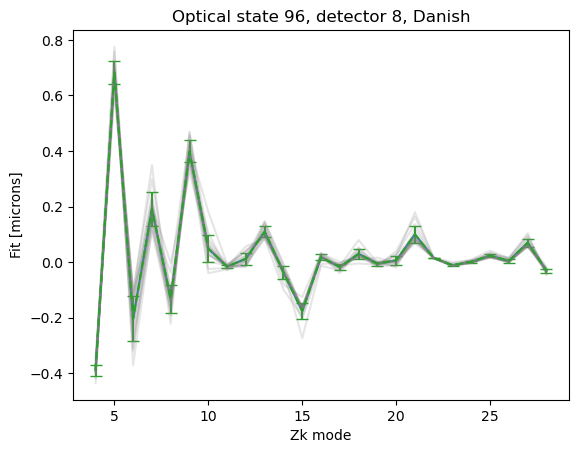

In [142]:

plt.plot(np.arange(4,29), zka[0])
plt.errorbar(np.arange(4, 29), zka[0], yerr=np.std(zkr_used, axis=0), ls="--", c="C2", label="TIE", capsize=4)
for i in range(len(zkr_used)):
    plt.plot(np.arange(4,29), zkr_used[i], alpha=0.2,c='grey')
plt.xlabel('Zk mode')
plt.ylabel('Fit [microns]')
plt.title(f'Optical state {state}, detector {raft}, {coll_method}')

In [105]:
def plot_fit(state, results):
    fig,axs = plt.subplots(3,3,figsize=(16,10))
    ax = np.ravel(axs)

    # this plots  just the pairing results 
    colors = {'danish':'green',  'tie':'orange'}
    for i in range(9):
        
        ax[i].set_title(i )
        
        for method in results.keys():
            # plot  averaged zks for danish and tie
            zkAvg = results[method][state][i]
            ax[i].plot(np.arange(4,29), zkAvg[0], marker='d', label=f'{method} ')
          
        ax[i].set_xticks(np.arange(4,29,step=2))
        ax[i].axhline(0,ls='--', c='red')
        ax[i].legend()
       
    fig.text(0.5,0.05, 'Zk mode')
    fig.text(0.05,0.5, 'Zk value [microns]', rotation='vertical')
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle(f'WET-007 comCam, state {state}, \n : TIE vs Danish')

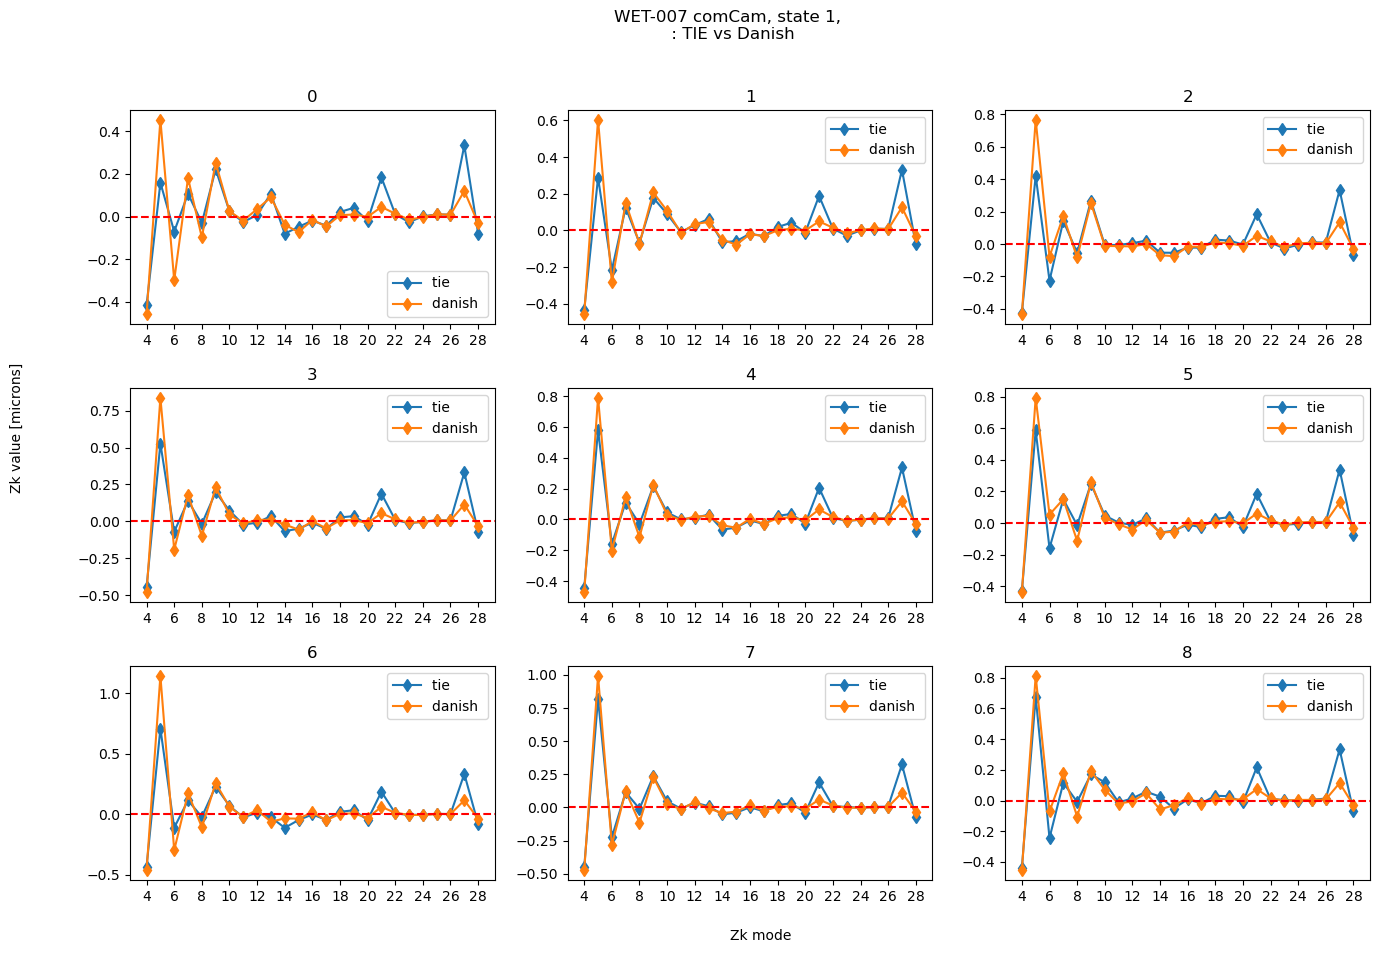

In [106]:
plot_fit(1, results)

Add information coming from scatter of individual fit results. This could be either a scatter of raw Zernike estimates per detector that got averaged,  or scatter in values of averaged Zernikes across detectors.

Illustrate first method: scatter in fit results from donuts that were accepted to contribute to the `zernikeEstimateAvg` :

In [ ]:
zkr = butler.get('zernikeEstimateRaw', dataId=ref.dataId,   collections=[output_collection])
zka = butler.get('zernikeEstimateAvg', dataId=ref.dataId,   collections=[output_collection])
zks = butler.get('zernikes', dataId=ref.dataId,    collections=[output_collection])
mask_used = zks['used'][1:]
zkr_used = zkr[mask_used]

plt.plot(np.arange(4,29), zka[0])
plt.errorbar(np.arange(4, 29), zka[0], yerr=np.std(zkr_used, axis=0), ls="--", c="C2", label="TIE", capsize=4)
for i in range(len(zkr_used)):
    plt.plot(np.arange(4,29), zkr_used[i], alpha=0.2,c='grey')
plt.xlabel('Zk mode')
plt.ylabel('Fit [microns]')
plt.title(f'Optical state {state}, detector {raft}, {coll_method}')

In [147]:
def plot_fit_errorbar(state, results):
    fig,axs = plt.subplots(3,3,figsize=(16,10))
    ax = np.ravel(axs)

    # this plots  just the pairing results 
    colors = {'danish':'green',  'tie':'orange'}
    for i in range(9):
        
        ax[i].set_title(i )
        
        for method in results.keys():
            # plot  averaged zks for danish and tie
            zkAvg = results[method][state][i]['zernikeEstimateAvg']
            zkRaw = results[method][state][i]['zernikeEstimateRaw']
            zks = results[method][state][i]['zernikes']
            mask_used = zks['used'][1:]
            zkr_used = zkRaw[mask_used]
            
            #ax[i].plot(np.arange(4,29), zkAvg[0], marker='d', label=f'{method} ')
            ax[i].errorbar(np.arange(4, 29), zkAvg[0], yerr=np.std(zkr_used, axis=0), 
                          label=f'{method} ', capsize=4)
            
        ax[i].set_xticks(np.arange(4,29,step=2))
        ax[i].axhline(0,ls='--', c='red')
        ax[i].legend()
       
    fig.text(0.5,0.05, 'Zk mode')
    fig.text(0.05,0.5, 'Zk value [microns]', rotation='vertical')
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle(f'WET-007 comCam, state {state}, \n : TIE vs Danish')

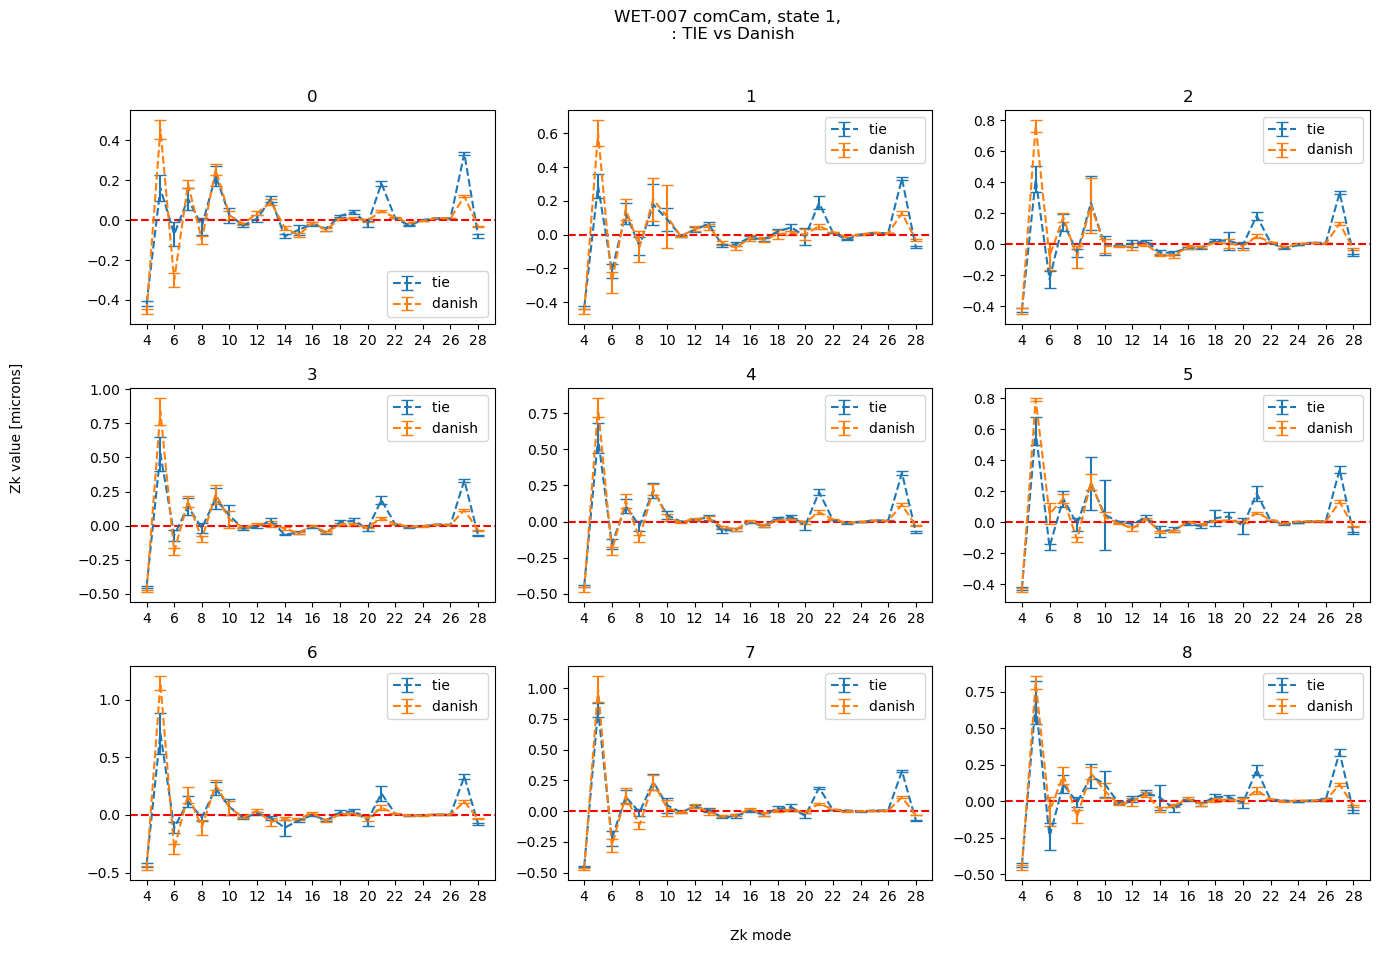

In [148]:
plot_fit_errorbar(1, results)

Illustrate the difference between the two methods:

In [111]:
def plot_diff(state, results):
    fig,axs = plt.subplots(3,3,figsize=(16,10))
    ax = np.ravel(axs)

    # this plots  just the pairing results 
    colors = {'danish':'green',  'tie':'orange'}
    for i in range(9):
        
        ax[i].set_title(i )
    
        # plot  difference for danish and tie
        zk1 = results['danish'][state][i][0]
        zk2 = results['tie'][state][i][0]
        ax[i].plot(np.arange(4,29),zk1-zk2, marker='d', label=f'{method} ')
      
        ax[i].set_xticks(np.arange(4,29,step=2))
        ax[i].axhline(0,ls='--', c='red')
        #ax[i].legend()
       
    fig.text(0.5,0.05, 'Zk mode')
    fig.text(0.05,0.5, f'$\Delta$ zk fit (Danish-TIE) [microns]', rotation='vertical')
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle(f'WET-007 comCam, state {state}, \n : TIE vs Danish')

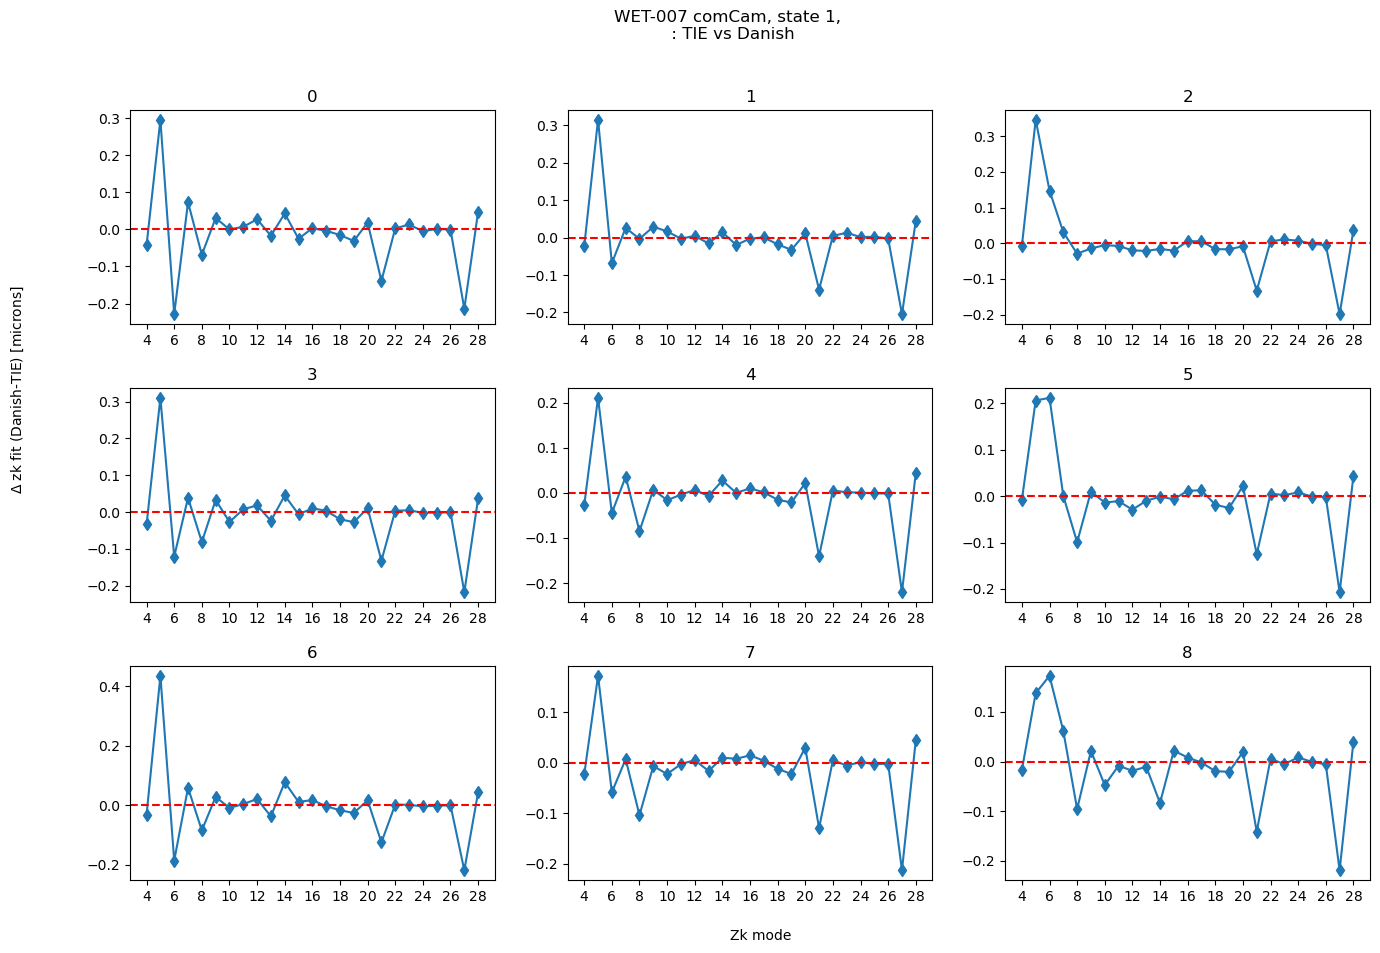

In [112]:
plot_diff(1, results)

In [ ]:
Calculate the RMS difference between TIE and Danish per detector per state: 

In [163]:
#results['danish'][44][4]

In [171]:
rmss={}
states = {}
for raft in range(9):
   rmss[raft] = []
   states[raft] = [] 
   for state in range(1,101):
        #print(raft, state)
        cond1 = len(results['danish'][state][raft])>1
        cond2 = len(results['tie'][state][raft])>1
        if cond1 and cond2 : 

            zk1 = results['danish'][state][raft]['zernikeEstimateAvg'][0]
            zk2 = results['tie'][state][raft]['zernikeEstimateAvg'][0]
            rms_diff =  np.sqrt(np.mean(np.square(zk1-zk2)))
            rmss[raft].append(rms_diff)
            states[raft].append(state)
            if rms_diff > 10:
                print(method, raft, state, rms_diff)

danish 1 45 608.7696423542536


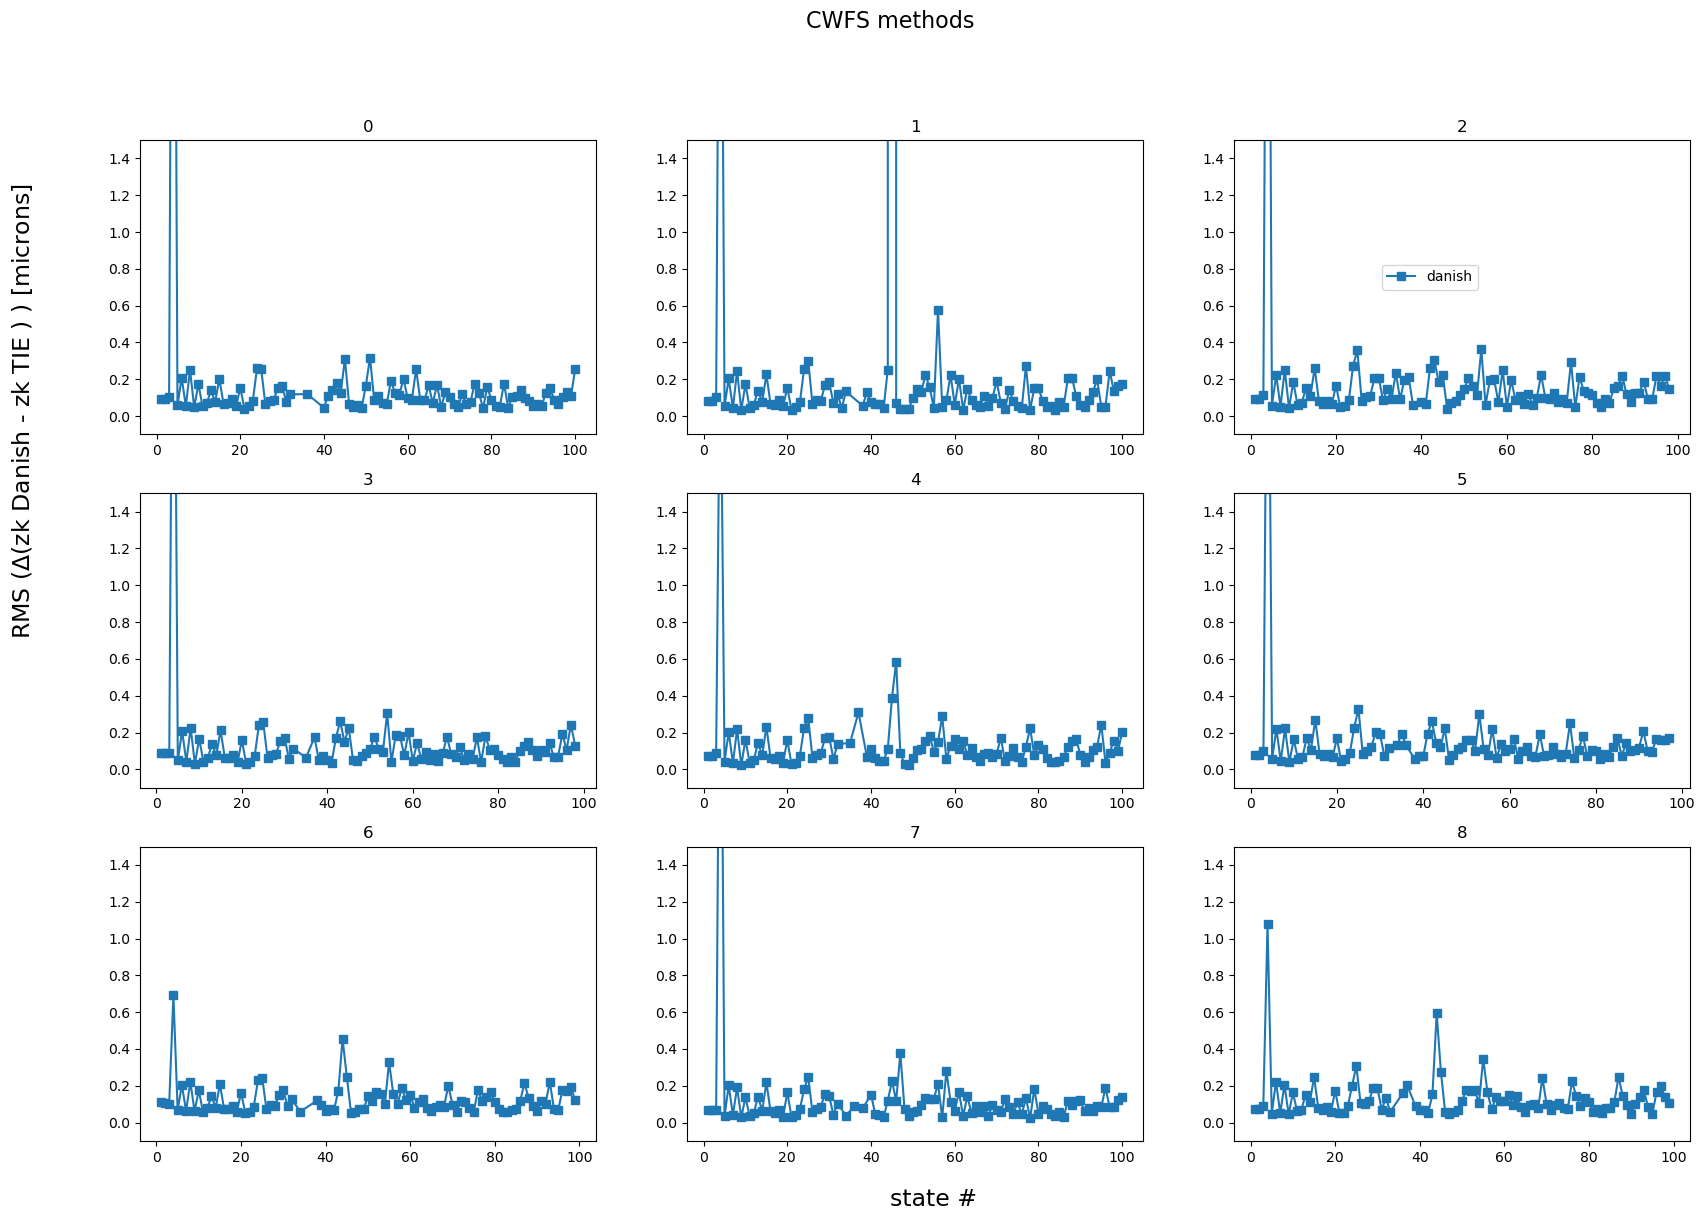

In [176]:
fig,axs = plt.subplots(3,3,figsize=(20,13))
ax = np.ravel(axs)

for raft in range(9):
    ax[raft].plot(states[raft], rmss[raft], marker='s', label=f'{method}')
    ax[raft].set_title(raft)
    ax[raft].set_ylim(-0.1,1.5)
   
fig.text(0.5,0.06,'state #', fontsize=17)
fig.text(0.06,0.5,r'RMS ($\Delta$(zk Danish - zk TIE ) ) [microns] ', rotation=90, fontsize=17)
fig.suptitle('CWFS methods', fontsize=16)
ax[2].legend(bbox_to_anchor=[0.55,.6])

NEXT:  

*  plot with errorbars ... 

In [153]:
np.in1d(list(results['danish'].keys()), list( results['tie'].keys()))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
Seems that all staes 

In [ ]:
fig,axs = plt.subplots(3,3,figsize=(10,8))
ax = np.ravel(axs)
for i in range(len(ax)):
    
    for visit in results['danish'].keys():
        danishFit = results['danish'][visit][i]['zernikeEstimateAvg'][0] 
        tieFit = results['tie'][visit][i]['zernikeEstimateAvg'][0] 
        diff = danishFit-tieFit   
        ax[i].plot(np.arange(4,29), diff, ls='-.', alpha=0.5, label=visit)
    ax[i].set_xticks(range(4,29,4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle(f'OR4 night1, cwfs visits, range {min(visits)}:{max(visits)}')
fig.text(0.5,0.05, 'Zk mode')
fig.text(0.05,0.5, f'$\Delta$ zk fit (Danish-TIE) [microns]', rotation='vertical')

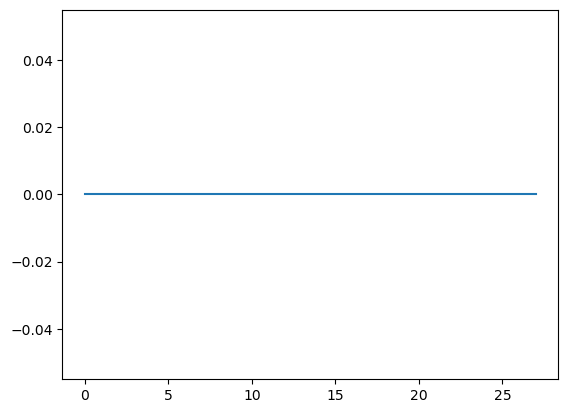

In [14]:
plt.plot(opd_zks_1_28)

Are the stamps there too ? 

In [2]:
#from lsst.daf import butler as dafButler
from lsst.daf.butler import Butler
import matplotlib.pyplot as plt 
from astropy.visualization import ZScaleInterval
import numpy as np

# Here there were 4 seqNums, but 2 intra/extra pairs.,
# so 2x9 = 18 which is exactly what we have  , keyed with 5024072306001 and 5024072306003
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('donutStampsIntra', 
                                         collections=['WET-001_lsstComCam_TIE_6001_6200_bps']
                                         #collections=['WET-001_lsstComCam_TIE_6001_6004_bps'],
                                         
                                         #collections=['WET-001_lsstComCam_TIE_6001_6002_bps'],
                                        ).expanded()
print(len(list(dataRefs)))
#for ref in dataRefs:
#    print(ref)


861


In [4]:
ref = list(dataRefs)[0]

In [6]:
zk = butler.get('zernikeEstimateRaw', dataId=ref.dataId,
               collections=['WET-001_lsstComCam_TIE_6001_6200_bps']
               )

In [8]:
#zk

Run it this way just for two seqNums to see what's going on ...

run -j 9 -b $REPO -i $INPUT_COLLECTION -o $OUTPUT_COLLECTION -p $PIPELINE_FILE -d "day_obs=20240625 and exposure.observation_type='cwfs' and instrument='LSSTComCamSim'" --register-dataset-types


    pipetask run -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_Danish_6001_6002_1  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesDanish.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723 and exposure.seq_num in (6001..6002) and detector.id=0"


--> this works just fine! 

\====



Can I add just `aggregateZernikeTablesTask: lsst.donut.viz.AggregateZernikeTablesTask` ? 


Try: 

    pipetask run -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_Danish_6001_6002_1_agg  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesDanish.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723 and exposure.seq_num in (6001..6002) and detector.id=0"

--> runs through,  but there's no `aggregateZernikesAvg` to look at ... 

========


Try adding 

    cutOutDonutsScienceSensorGroupTask:
        class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
        config:
          python: |
            from lsst.ts.wep.task.pairTask import GroupPairer
            config.pairer.retarget(GroupPairer)


    pipetask run -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_Danish_6001_6002_1_agg_grp  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDonutsZernikesDanishGrp.yaml -d "instrument='LSSTComCam' and exposure.day_obs = 20240723 and exposure.seq_num in (6001..6002) and detector.id=0"


--> does nothing! For that reason,  just run the pipeline to get to `zernikeEstimateRaw` ... 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import astropy.units as u
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(butlerRootPath)


In [18]:
dataRefs = butler.registry.queryDatasets('donutStampsIntra', 
                                         collections=['WET-001_lsstComCam_Danish_6001_6002_1'],
                                        ).expanded()
print(len(list(dataRefs)))
for ref in dataRefs:
    print(ref)

1
donutStampsIntra@{instrument: 'LSSTComCam', detector: 0, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=StampsBase] (run=WET-001_lsstComCam_Danish_6001_6002_1/20241030T180657Z id=b2e2f5fb-24c9-4a2d-b397-d8318a95f7e0)


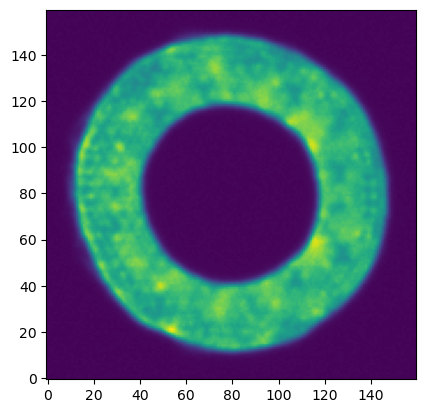

In [21]:
donutStampsIntra = butler.get('donutStampsIntra', dataId = ref.dataId, collections=['WET-001_lsstComCam_Danish_6001_6002_1'])
plt.imshow(donutStampsIntra[0].stamp_im.image.array, origin='lower')

In [22]:
dataRefs = butler.registry.queryDatasets('zernikeEstimateRaw', 
                                         collections=['WET-001_lsstComCam_Danish_6001_6002_1'],
                                        ).expanded()
print(len(list(dataRefs)))
for ref in dataRefs:
    print(ref)

1
zernikeEstimateRaw@{instrument: 'LSSTComCam', detector: 0, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=NumpyArray] (run=WET-001_lsstComCam_Danish_6001_6002_1/20241030T180657Z id=3d9b6865-67f3-4fa2-8467-afaad1c5cb9b)


In [36]:
zks = butler.get('zernikeEstimateAvg', dataId=ref.dataId, collections=['WET-001_lsstComCam_Danish_6001_6002_1']
                )

In [38]:
#zks

In [32]:
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('zernikes', 
                                         collections=['WET-001_lsstComCam_Danish_6001_6002_1_agg'],
                                        ).expanded()
print(len(list(dataRefs)))
for ref in dataRefs:
    print(ref)

1
zernikes@{instrument: 'LSSTComCam', detector: 0, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=AstropyQTable] (run=WET-001_lsstComCam_Danish_6001_6002_1_agg/20241030T182301Z id=cbff0371-c733-4b11-b7a4-776b87e05256)


In [34]:
zk = butler.get('zernikes', dataId=ref.dataId, 
                collections=['WET-001_lsstComCam_Danish_6001_6002_1_agg'],)


In [35]:
zk

label,used,"intra_field [x, y]","extra_field [x, y]","intra_centroid [x, y]","extra_centroid [x, y]",intra_mag,extra_mag,intra_sn,extra_sn,intra_entropy,extra_entropy,intra_frac_bad_pix,extra_frac_bad_pix,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28
,,deg,deg,pix,pix,,,,,,,,,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm,nm
str7,bool,"(float32, float32)","(float32, float32)","(float32, float32)","(float32, float32)",float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
average,True,"(nan, nan)","(nan, nan)","(nan, nan)","(nan, nan)",nan,nan,nan,nan,nan,nan,0.0,0.0,-459.3310852050781,455.72149658203125,-299.64208984375,180.696533203125,-97.98578643798828,253.07228088378906,24.28363800048828,-19.200956344604492,35.06612014770508,90.04843139648438,-38.238155364990234,-74.07313537597656,-16.069284439086914,-46.862274169921875,6.150755405426025,9.417940139770508,-1.5431246757507324,45.144840240478516,13.118109703063965,-13.672309875488281,-3.896787405014038,10.871501922607422,8.24843978881836,120.17826843261719,-32.254737854003906
pair1,True,"(-0.17022648, -0.24019705)","(-0.1699486, -0.24125414)","(3201., 1907.)","(3206., 1888.)",nan,nan,7047.4,7256.893,1.0800531,0.8972684,0.0,0.0,-467.6807861328125,453.4314270019531,-321.3668518066406,174.15628051757812,-97.61566162109375,275.7071838378906,38.7852668762207,-17.169713973999023,37.63481903076172,84.61373901367188,-33.14020538330078,-77.71855926513672,-16.315052032470703,-41.42829132080078,5.1454925537109375,2.7951724529266357,-0.9342767596244812,41.04659652709961,14.288531303405762,-13.578149795532227,-1.5432178974151611,12.204594612121582,6.396724700927734,111.92703247070312,-28.20096206665039
pair2,True,"(-0.18651697, -0.2018677)","(-0.18623908, -0.2029803)","(2908., 2596.)","(2913., 2576.)",nan,nan,5093.6553,5224.389,1.7063274,1.39257,0.0,0.0,-463.4400939941406,482.7894592285156,-292.2415771484375,172.3900146484375,-94.87638854980469,260.36279296875,27.77961540222168,-16.743925094604492,32.550323486328125,79.94074249267578,-32.9124755859375,-71.48381042480469,-14.14881420135498,-42.4415283203125,5.7320075035095215,6.217524528503418,-0.4823889136314392,43.498374938964844,13.798850059509277,-13.158413887023926,-3.2471506595611572,10.668045997619629,6.821978569030762,113.865234375,-29.56562042236328
pair3,True,"(-0.15574905, -0.16826236)","(-0.15547112, -0.16943042)","(3461., 3200.)","(3466., 3179.)",nan,nan,3646.8284,3735.362,2.5068417,2.1322181,0.0,0.0,-470.7565002441406,534.2730102539062,-283.908935546875,181.02159118652344,-110.57537841796875,190.1638641357422,6.865633487701416,-12.581404685974121,30.746423721313477,66.73287200927734,-36.05323791503906,-61.66685485839844,-9.959357261657715,-43.67570495605469,9.873201370239258,12.691904067993164,3.5859999656677246,39.03526306152344,14.376917839050293,-12.352643013000488,-2.817227840423584,10.231449127197266,6.8489484786987305,116.52629852294922,-33.49528884887695
pair4,True,"(-0.15442725, -0.23746699)","(-0.15414934, -0.23852406)","(3485., 1956.)","(3490., 1937.)",nan,nan,3495.0854,3602.5303,2.2780015,1.9454067,0.0,0.0,-461.9144287109375,446.8077087402344,-332.67138671875,170.0586395263672,-83.42011260986328,266.53448486328125,45.35388946533203,-17.48930549621582,42.44779586791992,85.64037322998047,-37.641258239746094,-74.71907806396484,-18.344707489013672,-41.46821212768555,5.740663528442383,6.8106184005737305,-1.1229532957077026,42.23818588256836,13.985748291015625,-15.102230072021484,-2.382300615310669,11.142424583435059,7.5444841384887695,116.90898895263672,-30.12330436706543
pair5,True,"(-0.24800543, -0.23159596)","(-0.23714326, -0.19453701)","(1803., 2062.)","(1998., 2728.)",nan,nan,2298.169,2394.6604,3.0358987,2.697491,0.0,0.0,-455.27444458007

Inspect the results:

In [54]:
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('donutCatalog', 
                                         collections=['WET-001_lsstComCam_TIE_6001_6200'],).expanded()


In [55]:
list(dataRefs)

[]

OLD:  Run donut detection / cutOuts on all defocal states:   





    bps submit site_bps.yaml  -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTCam/calib/unbounded -o WET-001_lsstComCam_direct_stamps_6001_6200  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDirectCutoutOnly.yaml -d "instrument='LSSTComCam' and exposure.seq_num in (6001..6200)" 

Check if all worked out:

In [133]:
collection = 'WET-001_lsstComCam_direct_stamps_6001_6200'
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('donutCatalog', collections=[collection],
                             where=f"instrument='LSSTComCam' and visit.day_obs = 20240723 ").expanded()
print(len(list(dataRefs)))
refs = []
for ref in dataRefs:
    refs.append(ref)

1740


Only 1740, which probably reflects all available defocal states, since not all had 9 detectors simulated (if all 100 states had 9 detectors, that would be 1800 total: 900 intra and 900 extra-focal separately simulated detectors). Here we have one ref per detector. 

Count how many detectors are available:

In [141]:
count = 0
for N in range(1,101):
    for defocal in ['intra', 'extra']:
        fnames = os.listdir(f'/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_{N}_{defocal}')
        amp_files = [fname for fname in fnames if fname.startswith('amp')]
        count+= len(amp_files)
print(f'Total detector amp_ count: {count}')

Total detector amp_ count: 1740


Ok, so all detectors got properly processed. 

These have less than 9:

In [139]:
for N in range(1,100):
    for defocal in ['intra', 'extra']:
        fnames = os.listdir(f'/sdf/data/rubin/user/gmegias/projects/commissioning_sims/WET-001_comcam/state_{N}_{defocal}')
        amp_files = [fname for fname in fnames if fname.startswith('amp')]
        if len(amp_files) < 9:
            print(defocal, 'state:', N, ', N simulated detectors:', len(amp_files))

intra state: 32 , N simulated detectors: 6
intra state: 33 , N simulated detectors: 4
extra state: 33 , N simulated detectors: 3
intra state: 34 , N simulated detectors: 5
extra state: 34 , N simulated detectors: 5
intra state: 35 , N simulated detectors: 5
extra state: 35 , N simulated detectors: 4
intra state: 36 , N simulated detectors: 5
extra state: 36 , N simulated detectors: 5
intra state: 37 , N simulated detectors: 5
extra state: 37 , N simulated detectors: 4
intra state: 38 , N simulated detectors: 6
extra state: 38 , N simulated detectors: 6
intra state: 39 , N simulated detectors: 6
extra state: 39 , N simulated detectors: 6


Check that the donuts got properly detected and cutouts look ok: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import astropy.units as u
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('postISRCCD', collections=['WET-001_lsstComCam_ISR'],
   where=f"instrument='LSSTComCam' and visit.day_obs = 20240723 and detector.id =0 and exposure.seq_num in (6001, 6002)").expanded()
print(len(list(dataRefs)))
refs = []
for ref in dataRefs:
    refs.append(ref)

2


In [4]:
refs

[DatasetRef(DatasetType('postISRCCD', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTComCam', detector: 0, exposure: 5024072306001, band: 'r', day_obs: 20240723, group: '5024072306001', physical_filter: 'r_03'}, run='WET-001_lsstComCam_ISR/20241029T221813Z', id=07ec4fb4-2930-4537-8696-76108763edbf),
 DatasetRef(DatasetType('postISRCCD', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTComCam', detector: 0, exposure: 5024072306002, band: 'r', day_obs: 20240723, group: '5024072306002', physical_filter: 'r_03'}, run='WET-001_lsstComCam_ISR/20241029T221813Z', id=790030d0-5dba-46b5-b3cd-7a492fd1c085)]

In [5]:
# plot the first available ref for illustration
exp_extra = butler.get('postISRCCD', dataId=refs[0].dataId, collections=['WET-001_lsstComCam_ISR'],)
exp_intra = butler.get('postISRCCD', dataId=refs[1].dataId, collections=['WET-001_lsstComCam_ISR'],)

In [11]:
dataRefs = butler.registry.queryDatasets('donutCatalog', collections=['WET-001_lsstComCam_TIE_6001_6200'],
   where=f"instrument='LSSTComCam'").expanded()
print(len(list(dataRefs)))
refs = []
for ref in dataRefs:
    refs.append(ref)

0


That's crazy! Why would there be no donut catalogs??? 

In [6]:
idx=0
dataIdExtra = {'instrument':'LSSTComCam',
          'detector':refs[idx].dataId.detector.id,
          'exposure':refs[idx].dataId.exposure.id,
          'visit':refs[idx].dataId.exposure.id,
          'day_obs':refs[idx].dataId.exposure.day_obs
         }
idx=1
dataIdIntra = {'instrument':'LSSTComCam',
          'detector':refs[idx].dataId.detector.id,
          'exposure':refs[idx].dataId.exposure.id,
          'visit':refs[idx].dataId.exposure.id,
          'day_obs':refs[idx].dataId.exposure.day_obs
         }

donutCatalogExtra = butler.get('donutCatalog',dataId=dataIdExtra, 
                               collections=['WET-001_lsstComCam_TIE_6001_6200']
                              )
                            #   collections=['WET-001_lsstComCam_direct_stamps_6001_6200'])

donutCatalogIntra = butler.get('donutCatalog',dataId=dataIdIntra, 
                               collections=['WET-001_lsstComCam_TIE_6001_6200']
                              )
                            #   collections=['WET-001_lsstComCam_direct_stamps_6001_6200'])

DatasetNotFoundError: Dataset donutCatalog with data ID {instrument: 'LSSTComCam', detector: 0, visit: 5024072306001} could not be found in collections ['WET-001_lsstComCam_TIE_6001_6200'].

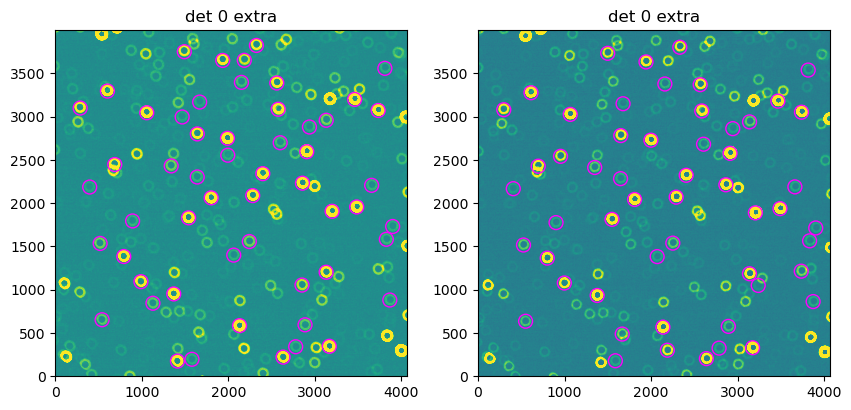

In [197]:
import matplotlib.pyplot as plt 
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()

fig,ax = plt.subplots(1,2,figsize=(10,5))
i=0
for exp, cat, title in zip([exp_intra, exp_extra], 
                                    [donutCatalogIntra, donutCatalogExtra], 
                                    ['intra', 'extra']
                                   ):
    d = exp.image.array
    vmin,vmax = zscale.get_limits(d)
    ax[i].imshow(d, vmin=vmin, vmax=vmax, origin='lower')
    
    ax[i].scatter(cat['centroid_x'], cat['centroid_y'], 
                marker='o', s=100, facecolors='none', edgecolors='magenta' 
                    )
    detId = refs[idx].dataId.detector.id
    ax[i].set_title(f'det {detId} extra')
    i +=1 

ok, so donuts got correctly detected. Do cutouts look ok?

Could do cutouts manually:

In [1]:
from lsst.ts.wep.task.cutOutDonutsScienceSensorTask import (CutOutDonutsScienceSensorTask,
CutOutDonutsScienceSensorTaskConfig)
from lsst.obs.lsst import LsstComCam

camera = LsstComCam.getCamera()
config = CutOutDonutsScienceSensorTaskConfig()
task = CutOutDonutsScienceSensorTask(config=config)

In [201]:
exp_intra.visitInfo.focusZ

0.0

Both exposures have `visitInfo.focusZ` as `0.0` (!) So there's no way that this could work.... 

In [202]:
exp_intra.visitInfo.focusZ = -1.5
exp_extra.visitInfo.focusZ = 1.5

AttributeError: property of 'VisitInfo' object has no setter

In [198]:
taskOut = task.run([exp_intra, exp_extra],[donutCatalogIntra, donutCatalogExtra], camera)

ValueError: Must have one extra-focal and one intra-focal image.

No cutouts at all! Run a test with just 2 states:


pipetask run -b  /sdf/data/rubin/repo/aos_imsim/ -i WET-001_lsstComCam_ISR,LSSTComCam/calib/unbounded -o WET-001_lsstComCam_direct_stamps_6001_test2  -p /sdf/group/rubin/shared/scichris/DM-46763_WET-007/lsstComCamPipelineDirectCutoutOnly.yaml -d "instrument='LSSTComCam' and exposure.seq_num = 6001" 


In [175]:
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('donutCatalog', 
           collections=['WET-001_lsstComCam_direct_stamps_6001_test2']).expanded()
for ref in dataRefs:
    print(ref)

donutCatalog@{instrument: 'LSSTComCam', detector: 0, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=DataFrame] (run=WET-001_lsstComCam_direct_stamps_6001_test2/20241017T211540Z id=1e855dee-7520-4651-949c-ec1f4503d070)
donutCatalog@{instrument: 'LSSTComCam', detector: 1, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=DataFrame] (run=WET-001_lsstComCam_direct_stamps_6001_test2/20241017T211540Z id=64235570-22fc-40a1-a757-b3b42e079bcc)
donutCatalog@{instrument: 'LSSTComCam', detector: 2, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=DataFrame] (run=WET-001_lsstComCam_direct_stamps_6001_test2/20241017T211540Z id=a287e722-3cc2-4acd-9f86-5cacffd6ae75)
donutCatalog@{instrument: 'LSSTComCam', detector: 3, visit: 5024072306001, band: 'r', day_obs: 20240723, physical_filter: 'r_03'} [sc=DataFrame] (run=WET-001_lsstComCam_direct_stamps_6001_test2/20241017T211540Z id=ccc62341-9270-4e3c-93a4-ad98fb

In [181]:
#butler.registry.queryDatasetTypes()

In [182]:
butlerRootPath = '/sdf/data/rubin/repo/aos_imsim/'
butler = dafButler.Butler(butlerRootPath)
dataRefs = butler.registry.queryDatasets('donutStampsIntra', 
           collections=['WET-001_lsstComCam_direct_stamps_6001_test2'],
                                        where=f"instrument='LSSTComCam'").expanded()
for ref in dataRefs:
    print(ref)

In [169]:
datarefs = butler.registry.queryDatasets('donutStampsIntra', 
                              collections=['WET-001_lsstComCam_direct_stamps_6001_6200'],
where=f"instrument='LSSTComCam'"
                             ).expanded()
refs = []
for ref in datarefs:
   refs.append(ref)

print(len(refs))

0


Nothing! How is that possible? 

In [162]:
donutStampsExtra= butler.get('donutStampsIntra',dataId=dataId, 
                             collections=['WET-001_lsstComCam_direct_stamps_6001_6200'])

DatasetNotFoundError: Dataset donutStampsIntra with data ID {instrument: 'LSSTComCam', detector: 0, visit: 5024072306002} could not be found in collections ['WET-001_lsstComCam_direct_stamps_6001_6200'].

In [ ]:
Run TIE and Danish us

In [ ]:
isrCollection =     "WET-001_lsstComCam_ISR"
cutoutsCollection = "WET-001_lsstComCam_direct_stamps"
tieCollection =     "WET-001_lsstComCam_direct_TIE"
danishCollection =  "WET-001_lsstComCam_direct_Danish"

isrYaml = "lsstComCamPipelineISR.yaml"
cutoutYaml = "lsstComCamPipelineDirectCutoutOnly.yaml"
danishYaml = "lsstComCamPipelineCalcDanishOnly.yaml"
tieYaml = "lsstComCamPipelineCalcTieOnly.yaml"

pathCwd = '/sdf/group/rubin/shared/scichris/DM-46763_WET-007'
isrYamlPath = os.path.join(pathCwd, isrYaml)
cutoutYamlPath = os.path.join(pathCwd, cutoutYaml)
danishYamlPath = os.path.join(pathCwd, danishYaml)
tieYamlPath = os.path.join(pathCwd, tieYaml)

cmdCutout = f"bps submit site_bps.yaml  -b  {butlerRootPath} -i {isrCollection},LSSTCam/calib/unbounded \
-o {cutoutsCollection}  -p {cutoutYamlPath}"

cmdDanish = f"bps submit site_bps.yaml  -b  {butlerRootPath} -i {cutoutsCollection} \
-o {danishCollection}  -p {danishYamlPath} "

cmdTie = f"bps submit site_bps.yaml  -b  {butlerRootPath} -i {cutoutsCollection} \
-o {tieCollection}  -p {tieYamlPath}"

print(cmdCutout, "\n")
print(cmdDanish, "\n")
print(cmdTie, "\n")
